# Finding the Best _Star Wars_ Movie of the Franchise, According to Americans

## Introduction

_Star Wars_ is one of the most well-known, popular, and successful franchises of all time, watched and beloved around the world. But which movie within the franchise is the best? In this project, we attempt to identify America's favorite _Star Wars_ movie using the results of a survey of _Star Wars_ fans conducted by [FiveThirtyEight](https://fivethirtyeight.com). The original dataset can be found on the [fivethirtyeight GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey), and the original story published from the survey results is available [here](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/).

The full data dictionary for all relevant columns in the survey dataset is provided below:
- `RespondentID` - anonymous ID of survey respondent;
- `Have you seen any of the 6 films in the Star Wars franchise?` - yes/no response indicating whether respondent has seen _Star Wars_;
- `Do you consider yourself to be a fan of the Star Wars film franchise?` - yes/no response indicating whether respondent considers themselves a _Star Wars_ fan;
- `Which of the following Star Wars films have you seen? Please select all that apply.` - checkbox response indicating whether respondent has seen each of six _Star Wars_ films in franchise; this column and the following five unnamed columns each correspond to one of the films in chronological order;
- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - integer response (1-6) indicating respondent's ranking of each of six _Star Wars_ films in franchise from best to worst; this column and the following five unnamed columns each correspond to one of the films in chronological order;
- `Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.` - checkbox response indicating how respondent views individual Star Wars characters; this column and the following thirteen columns each correspond to a single character;
- `Which character shot first?` - checkbox response indicating which character the respondent believes to have shot first (Han Solo or Greedo);
- `Are you familiar with the Expanded Universe?` - yes/no response indicating whether respondent familiar with Star Wars expanded universe;
- `Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦` - yes/no response indicating whether respondent a fan of Star Wars expanded universe;
- `Do you consider yourself to be a fan of the Star Trek franchise?` - yes/no response indicating whether respondent considers themselves a _Star Trek_ fan;
- `Gender` - gender of respondent;
- `Age` - age of respondent;
- `Household Income` - household income of respondent;
- `Education` - education level of respondent;
- `Location (Census Region)` - location of respondent;

Our goal in this project is to clean and analyze the Star Wars survey results dataset in order to identify the most popular film in the franchise among the respondents and among different sections of the respondent population.

### Summary of Results
Based on our analysis, Episode V is the clear (and unexpected) favorite across all demographics. The full analysis is presented below.

## Cleaning the _Star Wars_ Survey Results Data

The first step in our analysis is to clean the data. Immediately upon viewing the first ten rows of the dataset, we see that the first row is filled with column subheaders rather than survey responses. As long as we know what each column represents (and we do - see the data dictionary above), we can get rid of this first row so that our resulting dataset only contains actual data.

In [1]:
# import pandas library and read in dataset
import numpy as np
import pandas as pd
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

In [2]:
# view first ten rows of dataset
print(star_wars.head(10))

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

In [3]:
# view column names
for col in star_wars.columns:
    print(col)

RespondentID
Have you seen any of the 6 films in the Star Wars franchise?
Do you consider yourself to be a fan of the Star Wars film franchise?
Which of the following Star Wars films have you seen? Please select all that apply.
Unnamed: 4
Unnamed: 5
Unnamed: 6
Unnamed: 7
Unnamed: 8
Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
Unnamed: 10
Unnamed: 11
Unnamed: 12
Unnamed: 13
Unnamed: 14
Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.
Unnamed: 16
Unnamed: 17
Unnamed: 18
Unnamed: 19
Unnamed: 20
Unnamed: 21
Unnamed: 22
Unnamed: 23
Unnamed: 24
Unnamed: 25
Unnamed: 26
Unnamed: 27
Unnamed: 28
Which character shot first?
Are you familiar with the Expanded Universe?
Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦
Do you consider yourself to be a fan of the Star Trek franchise?
Gender
Age
Household Income
Education
Locat

In [4]:
# remove first row from dataset
star_wars = star_wars[1:]

### Converting Yes/No Responses

Next, we want to convert the columns containing responses to yes/no questions from string types to Boolean types, mapping `'Yes'` entries to `True` and `'No'` entries to `False`. Missing entries will remain as `NaN` values. The resulting Boolean entries will be easier to work with in our analysis. 

In [5]:
# define dictionary to map 'yes'/'no' to bools
yes_no = { 'Yes':True, 'No':False }
# convert yes/no columns to bools
yes_no_cols = [
    'Have you seen any of the 6 films in the Star Wars franchise?',
    'Do you consider yourself to be a fan of the Star Wars film franchise?',
    'Are you familiar with the Expanded Universe?',
    'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
    'Do you consider yourself to be a fan of the Star Trek franchise?'
]
for col in yes_no_cols:
    star_wars[col] = star_wars[col].map(yes_no)

In [6]:
# check changes
print(star_wars[yes_no_cols].head(10))

    Have you seen any of the 6 films in the Star Wars franchise?  \
1                                                True              
2                                               False              
3                                                True              
4                                                True              
5                                                True              
6                                                True              
7                                                True              
8                                                True              
9                                                True              
10                                               True              

   Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                                True                      
2                                                 NaN                      
3                      

### Converting Checkbox Responses

We also need to convert the columns containing responses to checkbox questions to more meaningful and easily readable types. Each checkbox question consists of a series of boxes the respondent can check off in answer to the question. Each box within the series is represented by an individual column. The first column in the series is named according to the survey checkbox question, and the remaining columns in the series, representing the remaining checkbox reponses for that question, are unnamed. We will need to rename the checkbox question columns to be more illuminating as to their contents and to convert the entries to new types and/or values to ease later analysis.

#### Cleaning the Seen Films Columns

We'll first clean the columns associated to the question regarding which _Star Wars_ films the respondent has seen: `Which of the following Star Wars films have you seen? Please select all that apply.` There are six columns corresponding to this question that indicate whether the respondent has seen each individual episode of the _Star Wars_ franchise, as described below:
- `Which of the following Star Wars films have you seen? Please select all that apply.` - whether or not the respondent has seen `Star Wars: Episode I The Phantom Menace`;
- `Unnamed: 4` - whether or not the respondent has seen `Star Wars: Episode II Attack of the Clones`;
- `Unnamed: 5` - whether or not the respondent has seen `Star Wars: Episode III Revenge of the Sith`;
- `Unnamed: 6` - whether or not the respondent has seen `Star Wars: Episode IV A New Hope`;
- `Unnamed: 7` - whether or not the respondent has seen `Star Wars: Episode V The Empire Strikes Back`;
- `Unnamed: 8` - whether or not the respondent has seen `Star Wars: Episode VI Return of the Jedi`.

Each of the above columns contains either the name of the corresponding movie, indicating the respondent saw that movie, or a value of `NaN`, indicating the respondent either did not see that movie or did not answer the question. For the purposes of the analysis, we assume an `NaN` entry indicates a negative response. 

Since each of these column entries represents a True/False value as to whether the respondent saw a specific movie, we can convert the entries to Boolean values using a mapping technique and rename the columns to indicate which movie each column corresponds to. 

In [7]:
# rename seen films columns
seen_cols = star_wars.columns[3:9]
seen_cols_dict = {}
for icol, col in enumerate(seen_cols):
    seen_cols_dict[col] = 'seen_episode{}'.format(icol+1)
star_wars = star_wars.rename(columns=seen_cols_dict)
# check new column names
print(star_wars.columns[3:9])

Index(['seen_episode1', 'seen_episode2', 'seen_episode3', 'seen_episode4',
       'seen_episode5', 'seen_episode6'],
      dtype='object')


In [8]:
# define function to map seen film entries to True/False values
def labelSeen(entry):
    if type(entry) == str:
        return True
    else:
        return False
# reassign seen_cols to pick up new column names
seen_cols = star_wars.columns[3:9]
# check number of non-null seen film entries before column conversion
print(star_wars[seen_cols].notnull().sum())

seen_episode1    673
seen_episode2    571
seen_episode3    550
seen_episode4    607
seen_episode5    758
seen_episode6    738
dtype: int64


In [9]:
# convert seen film column entries to True/False values
for col in seen_cols:
    star_wars[col] = star_wars[col].map(labelSeen)

In [10]:
# check number of True seen film entries after column conversion
print(star_wars[seen_cols].sum())

seen_episode1    673
seen_episode2    571
seen_episode3    550
seen_episode4    607
seen_episode5    758
seen_episode6    738
dtype: int64


#### Cleaning the Ranked Films Columns

Next, we'll clean the columns associated to the question regarding the respondent's ranking of the individual _Star Wars_ films: `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` There are six columns corresponding to this question that indicate the order in which the respondent ranks each individual episode of the _Star Wars_ franchise from best (1) to worst (6), as described below:
- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - the respondent ranking of `Star Wars: Episode I The Phantom Menace`;
- `Unnamed: 10` - the respondent ranking of `Star Wars: Episode II Attack of the Clones`;
- `Unnamed: 11` - the respondent ranking of `Star Wars: Episode III Revenge of the Sith`;
- `Unnamed: 12` - the respondent ranking of `Star Wars: Episode IV A New Hope`;
- `Unnamed: 13` - the respondent ranking of `Star Wars: Episode V The Empire Strikes Back`;
- `Unnamed: 14` - the respondent ranking of `Star Wars: Episode VI Return of the Jedi`.

Each of the entries in the above columns contains a number, in the form of a string, between one and six or a missing value (`1`, `2`, `3`, `4`, `5`, `6`, or `NaN`). To clean these data columns, we simply need to convert the entries to numeric types (we can leave the `NaN` values alone). Then, we can rename the columns accordingly to reflect their contents, as done for the seen film columns above.

In [11]:
# rename ranked films columns
rank_cols = star_wars.columns[9:15]
rank_cols_dict = {}
for icol, col in enumerate(rank_cols):
    rank_cols_dict[col] = 'ranking_episode{}'.format(icol+1)
star_wars = star_wars.rename(columns=rank_cols_dict)
# check new column names
print(star_wars.columns[9:15])

Index(['ranking_episode1', 'ranking_episode2', 'ranking_episode3',
       'ranking_episode4', 'ranking_episode5', 'ranking_episode6'],
      dtype='object')


In [12]:
# reassign rank_cols to pick up new column names
rank_cols = star_wars.columns[9:15]
# check number of non-null ranked film entries before column conversion
print(star_wars[rank_cols].notnull().sum())

ranking_episode1    835
ranking_episode2    836
ranking_episode3    835
ranking_episode4    836
ranking_episode5    836
ranking_episode6    836
dtype: int64


In [13]:
# convert ranked film entries to numeric types
star_wars[rank_cols] = star_wars[rank_cols].astype(float)

In [14]:
# check number of non-null ranked film entries after column conversion
print(star_wars[rank_cols].notnull().sum())
# check new column data types
print(star_wars[rank_cols].dtypes)

ranking_episode1    835
ranking_episode2    836
ranking_episode3    835
ranking_episode4    836
ranking_episode5    836
ranking_episode6    836
dtype: int64
ranking_episode1    float64
ranking_episode2    float64
ranking_episode3    float64
ranking_episode4    float64
ranking_episode5    float64
ranking_episode6    float64
dtype: object


#### Cleaning the Favorite Characters Columns

Finally, we want to clean the columns associated to the question regarding the respondent's views towards various Star Wars characters: `Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.` There are fourteen columns corresponding to this question that indicate how favorably the respondent views individual characters within the Star Wars universe, as described below:
- `Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.` - the respondent's view towards the character `Han Solo`;
- `Unnamed: 16` - the respondent's view towards the character `Luke Skywalker`;
- `Unnamed: 17` - the respondent's view towards the character `Princess Leia Organa`;
- `Unnamed: 18` - the respondent's view towards the character `Anakin Skywalker`;
- `Unnamed: 19` - the respondent's view towards the character `Obi Wan Kenobi`;
- `Unnamed: 20` - the respondent's view towards the character `Emperor Palpatine`;
- `Unnamed: 21` - the respondent's view towards the character `Darth Vader`;
- `Unnamed: 22` - the respondent's view towards the character `L:ondo Calrissian`;
- `Unnamed: 23` - the respondent's view towards the character `Boba Fett`;
- `Unnamed: 24` - the respondent's view towards the character `C-3P0`;
- `Unnamed: 25` - the respondent's view towards the character `R2 D2`;
- `Unnamed: 26` - the respondent's view towards the character `Jar Jar Binks`;
- `Unnamed: 27` - the respondent's view towards the character `Padme Amidala`;
- `Unnamed: 28` - the respondent's view towards the character `Yoda`.

Each entry in the above columns is one of a set of designated string values indicating how favorably the respondent views the corresponding character or an `NaN` value indicating a lack of response. The set of string values is as follows:
- `Very favorably`
- `Somewhat favorably`
- `Somewhat unfavorably`
- `Very unfavorably`
- `Neither favorably nor unfavorably (neutral)`
- `Unfamiliar (N/A)`

We don't want to alter these entries, since there's no good way to convert them without losing some of their meaning. Instead, we will simply rename the columns to reflect the individual characters to which they correspond.

In [15]:
# rename character column
char_cols = star_wars.columns[15:29]
characters = ['Han Solo', 
              'Luke Skywalker', 
              'Princess Leia Organa',
              'Anakin Skywalker', 
              'Obi Wan Kenobi', 
              'Emperor Palpatine', 
              'Darth Vader', 
              'Lando Calrissian',
              'Boba Fett',
              'C-3P0',
              'R2 D2',
              'Jar Jar Binks',
              'Padme Amidala',
              'Yoda']
char_cols_dict = {}
for icol, col in enumerate(char_cols):
    char_cols_dict[col] = 'Character Favorability: ' + characters[icol]
star_wars = star_wars.rename(columns=char_cols_dict)
# check new column names
print(star_wars.columns[15:29])

Index(['Character Favorability: Han Solo',
       'Character Favorability: Luke Skywalker',
       'Character Favorability: Princess Leia Organa',
       'Character Favorability: Anakin Skywalker',
       'Character Favorability: Obi Wan Kenobi',
       'Character Favorability: Emperor Palpatine',
       'Character Favorability: Darth Vader',
       'Character Favorability: Lando Calrissian',
       'Character Favorability: Boba Fett', 'Character Favorability: C-3P0',
       'Character Favorability: R2 D2',
       'Character Favorability: Jar Jar Binks',
       'Character Favorability: Padme Amidala',
       'Character Favorability: Yoda'],
      dtype='object')


## Analyzing the _Star Wars_ Survey Results Data

Now that we've cleaned our dataset, we can begin analyzing it in order to answer our initial question: which _Star Wars_ movie is the best?

### Finding the Highest-Ranked Movie

We start by identifying the highest-ranked movie in the franchise, according to the survey results. We can calculate the average ranking of each movie by computing the mean value of each ranked film column, and we can visualize the results in a bar chart, as illustrated below.

In [16]:
# compute mean value of each ranked film column
rank_means = star_wars[rank_cols].mean()

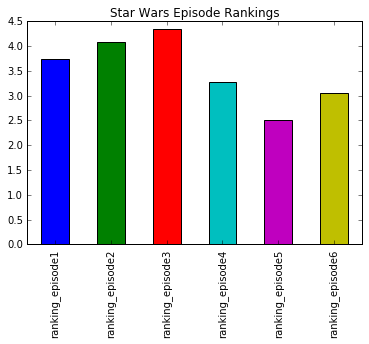

In [17]:
# import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
# plot bar chart
rank_means.plot.bar()
plt.title('Star Wars Episode Rankings')
plt.show()

The bar chart above shows the average ranking (from 1 to 6, with 1 being the best and 6 being the worst) of each _Star Wars_ Episode in the franchise. The highest ranked movie is Episode V, with an average rating of approximately 2.5, followed by Episodes VI and IV, with average ratings of slightly below and above 3.0, respectively. These three Episodes are the original movies, widely regarded as superior to the newer prequels, and Episode V is critically rated the highest of any film in the franchise. Episodes I, II, and III are ranked fourth, fifth, and sixth, with average ratings of approximately 3.75, 4.0, and 4.25, respectively. These films received mixed reviews by critics and are generally not as well liked as the originals. The rankings gleaned from the survey results are thus consistent with general popular and critical opinion.

### Studying Episode Viewership

Next, we will look at the average viewership of each individual Episode by summing up the number of `True` values in each of the seen film columns. Since Booleans evaluate to integer values, with `True` equal to `1` and `False` equal to `0`, this is equivalent to computing the mean value for each column. Again, we present the results in a bar chart below.

In [18]:
# compute sum of each seen film column
seen_sums = star_wars[seen_cols].sum()

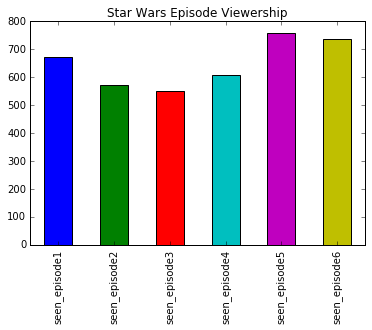

In [19]:
# plot bar chart
seen_sums.plot.bar()
plt.title('Star Wars Episode Viewership')
plt.show()

We observe a similar trend in Episode viewership as we did in Episode ranking, with the original movies having more views in general than the newer movies. For the most part, the average ranking of each Episode is correlated with its average viewership, with higher ranked movies being viewed more often.

### Analyzing Episode Popularity by Subgroup

Now let's take a look at the popularity of each movie, based on viewership and ranking, within different segments of the survey population. We can divide the dataset into various subgroups by splitting the data according to distinct values within a column. For example, we can split the data by gender, dividing the dataset into two groups: one containing survey results from males and the other containing survey results from females. We investigate and compare individual movie popularity between subgroups for several different segmenting variables below.

#### Episode Popularity by Gender

We first investigate the popularity of each movie by gender, which is a binary variable (meaning it only has two unique values and segments the population into two distinct groups). Bar charts for the ranking and viewership of each Episode according to men and women, separately, are shown below. 

In [20]:
# split data by gender
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

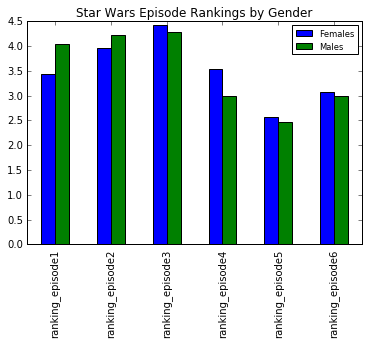

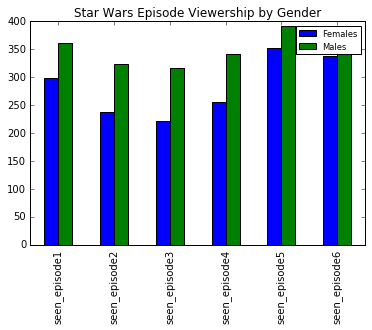

In [60]:
# compute mean value of each ranked film column per gender
male_rank_means = males[rank_cols].mean()
female_rank_means = females[rank_cols].mean()
# compute sum of each seen film column per gender
male_seen_sums = males[seen_cols].sum()
female_seen_sums = females[seen_cols].sum()
# combine male + female series into dataframes
gender_rank = pd.DataFrame({'Males':male_rank_means, 
                            'Females':female_rank_means})
gender_seen = pd.DataFrame({'Males':male_seen_sums,
                            'Females':female_seen_sums})
# plot bar charts
gender_rank.plot.bar()
plt.title('Star Wars Episode Rankings by Gender')
plt.legend(fontsize="small")
plt.show()
gender_seen.plot.bar()
plt.title('Star Wars Episode Viewership by Gender')
plt.legend(fontsize="small")
plt.show()

We can see from the bar charts above that more men have seen the Star Wars films than women. However, the popularity of each individual movie is common across both genders: Episode V is the most viewed and highest ranked movie, and Episode III is the least viewed and lowest ranked movie, for both men and women.

#### Episode Popularity by Age

Next, we analyze the popularity of each movie by the respondent's age. The age column can be divided into four separate categories of age ranges: `18-29`, `30-44`, `45-60`, and `> 60`, so we can separately examine the most popular Star Wars movie within each age population.

In [29]:
# view age groups
print(star_wars['Age'].value_counts())

45-60    291
> 60     269
30-44    268
18-29    218
Name: Age, dtype: int64


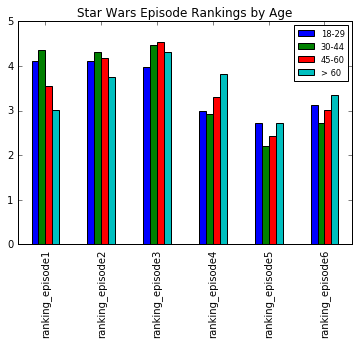

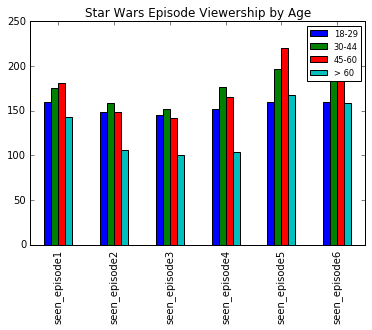

In [59]:
# split data by age
# --> initialize rank-mean and seen-sum dictionaries for different age groups
age_rank_dict = {}
age_seen_dict = {}
# --> loop over unique age values and fill dictionaries
for val in star_wars['Age'].value_counts().index:
    age = star_wars[star_wars['Age'] == val]
    age_rank_dict[val] = age[rank_cols].mean()
    age_seen_dict[val] = age[seen_cols].sum()
# --> combine age group series into dataframes
age_rank = pd.DataFrame(age_rank_dict)
age_seen = pd.DataFrame(age_seen_dict)
# plot bar charts
age_rank.plot.bar()
plt.title('Star Wars Episode Rankings by Age')
plt.legend(fontsize="small")
plt.show()
age_seen.plot.bar()
plt.title('Star Wars Episode Viewership by Age')
plt.legend(fontsize="small")
plt.show()

We can see from the bar charts above that the Star Wars franchise in general is most popular (in terms of viewership) among adults aged 30 to 60 years old. This is not unexpected, since Episodes 1 through VI came out between 15 and 43 years ago, meaning the population of respondents within this age range likely would have been teenagers when the original movies (Episodes IV - VI) or the newer prequels (Episodes I - III) were first released. Teenagers are among the prime theater-going demographics and were the original target audience of the Star Wars films. Within this group, 45-60 year olds have the highest viewership for each movie except Episodes II and III, for which 30-44 year olds have higher viewership.

Additionally, we see no real discrepancy in favorite movie between age groups, with Episode V the highest ranked and most viewed for all ages.

#### Episode Popularity by Household Income

We can also investigate the popularity of each movie according to the respondent's household income, which is divided into five income brackets: \$0 - \$24,999, \$25,000 - \$49,999, \$50,000 - \$99,999, \$100,000 - \$149,999, and \$150,000+.

In [30]:
# view income groups
print(star_wars['Household Income'].value_counts())

$50,000 - $99,999      298
$25,000 - $49,999      186
$100,000 - $149,999    141
$0 - $24,999           138
$150,000+               95
Name: Household Income, dtype: int64


In [34]:
# remove dollar signs from incomes
star_wars['Household Income'] = star_wars['Household Income'].str.replace('$','')
# check changes
print(star_wars['Household Income'].value_counts())

50,000 - 99,999      298
25,000 - 49,999      186
100,000 - 149,999    141
0 - 24,999           138
150,000+              95
Name: Household Income, dtype: int64


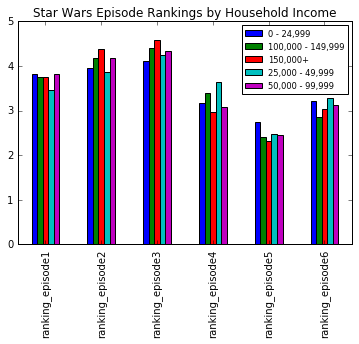

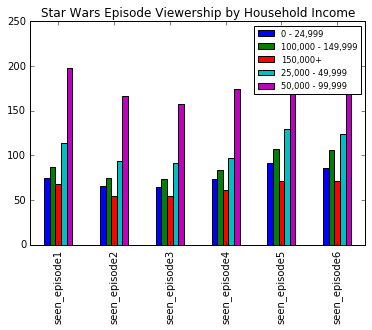

In [58]:
# split data by income
# --> initialize rank-mean and seen-sum dictionaries for different income groups
income_rank_dict = {}
income_seen_dict = {}
# --> loop over unique income values and fill dictionaries
for val in star_wars['Household Income'].value_counts().index:
    income = star_wars[star_wars['Household Income'] == val]
    income_rank_dict[val] = income[rank_cols].mean()
    income_seen_dict[val] = income[seen_cols].sum()
# --> combine income group series into dataframes
income_rank = pd.DataFrame(income_rank_dict)
income_seen = pd.DataFrame(income_seen_dict)
# plot bar charts
income_rank.plot.bar()
plt.title('Star Wars Episode Rankings by Household Income')
plt.legend(fontsize="small")
plt.show()
income_seen.plot.bar()
plt.title('Star Wars Episode Viewership by Household Income')
plt.legend(fontsize="small")
plt.show()

The bar charts above show the ranking and viewership of each Episode per househole income group. The wealthiest respondents have the lowest viewership, and respondents in the \$50,000 - \$99,999 income bracket have the highest viewership. There is very little discrepancy between ranking among the different income brackets.

#### Episode Popularity by Education

It may also be interesting to view the breakdown of movie popularity by respondent education level, where respondents are grouped according to their highest degree of education.

In [53]:
# view education groups
print(star_wars['Education'].value_counts())

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64


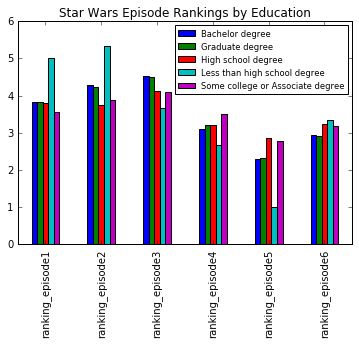

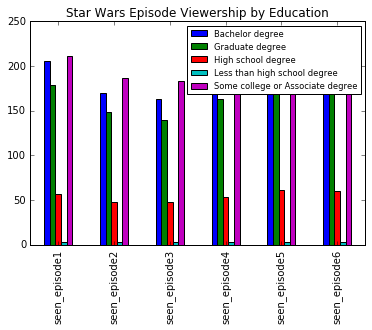

In [57]:
# split data by education
# --> initialize rank-mean and seen-sum dictionaries for different education groups
edu_rank_dict = {}
edu_seen_dict = {}
# --> loop over unique education values and fill dictionaries
for val in star_wars['Education'].value_counts().index:
    edu = star_wars[star_wars['Education'] == val]
    edu_rank_dict[val] = edu[rank_cols].mean()
    edu_seen_dict[val] = edu[seen_cols].sum()
# --> combine education group series into dataframes
edu_rank = pd.DataFrame(edu_rank_dict)
edu_seen = pd.DataFrame(edu_seen_dict)
# plot bar charts
edu_rank.plot.bar()
plt.title('Star Wars Episode Rankings by Education')
plt.legend(fontsize="small")
plt.show()
edu_seen.plot.bar()
plt.title('Star Wars Episode Viewership by Education')
plt.legend(fontsize="small")
plt.show()

Again, we see no disagreement in ranking between education levels, with Episodes V the highest ranked and Episodes I through III the lowest ranked (though respondents with the lowest level of education appear to particularly dislike Episodes I and II over Episode III). 

The viewership, however, varies greatly between education groups, with respondents holding a high school degree making up only about a quarter of the overall viewership per movie, and respondents with less than a high school degree accounting for only a few viewers. On the other hand, the viewership is nearly evenly spread out between the three higher-level education groups, and the viewership per education leven does not vary greatly between individual movies. It is unclear why people with less education do not watch Star Wars as much as those with more education, but it is an interesting observation.

# Conclusion
In the analysis presented above, we cleaned and analyzed a dataset of survey results from FiveThirtyEight regarding the popularity of the the _Star Wars_ films. We found _Star Wars: Episode V - The Empire Strikes Back_ to be the universal favorite, both in terms of ranking and viewership, overall and across all demographics.

Additionally, we observed men between the ages of 30-60 of median income and some college-level education to be the most frequent viewers of the _Star Wars_ franchise.